In [6]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from parflow.tools.io import read_pfb, write_pfb
import random 
from scipy import ndimage, datasets

In [7]:
def neighbors_d8(x):
    return (
        np.roll(x, 1, axis=0), 
        np.roll(x, -1, axis=0), 
        np.roll(x, 1, axis=1),
        np.roll(x, -1, axis=1),
        np.roll(np.roll(x, 1, axis=0), 1, axis=1),
        np.roll(np.roll(x, 1, axis=0), -1, axis=1),
        np.roll(np.roll(x, -1, axis=0), 1, axis=1),
        np.roll(np.roll(x, -1, axis=0), -1, axis=1)
   )

In [8]:
ind_orig = read_pfb('/home/at8471/c1_inversion/ml_training/inputs/grid3d.v3.pfb')

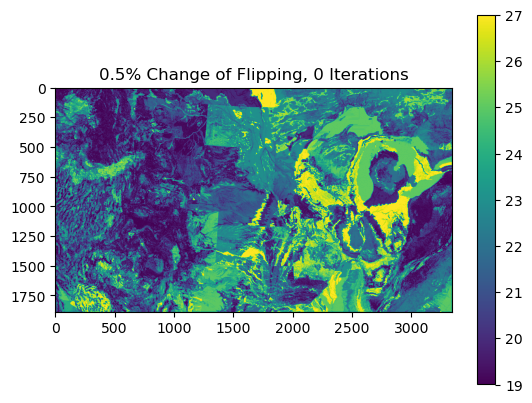

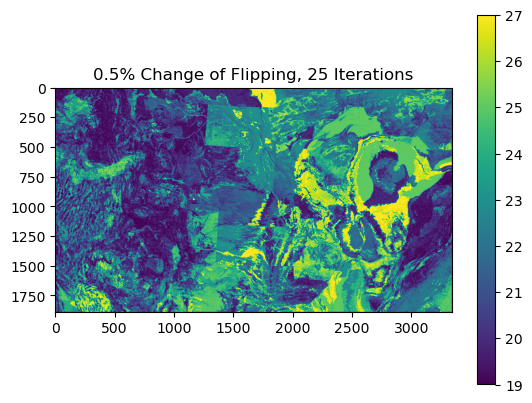

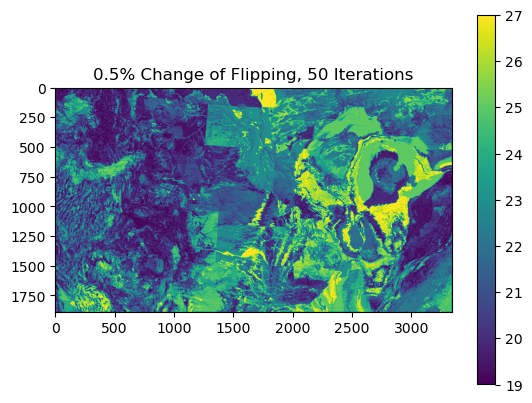

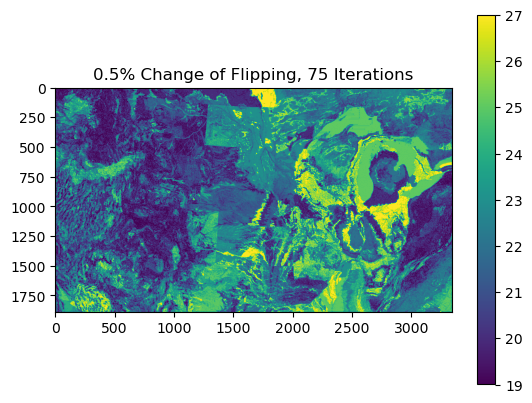

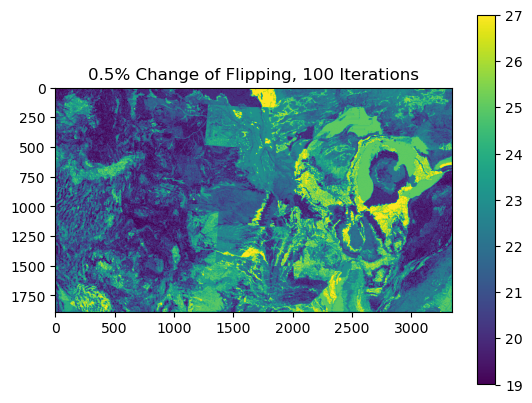

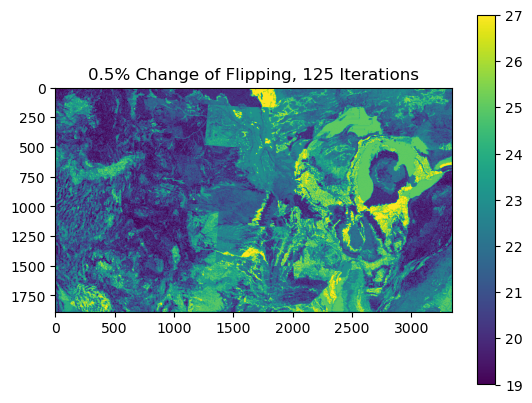

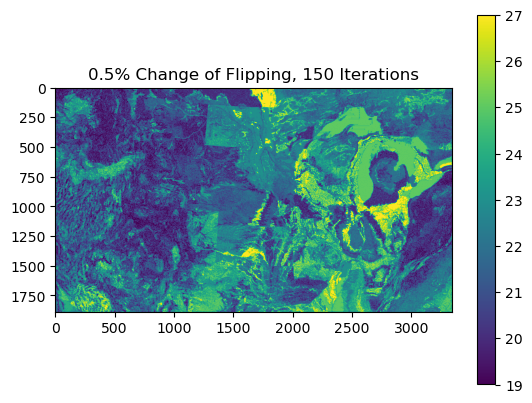

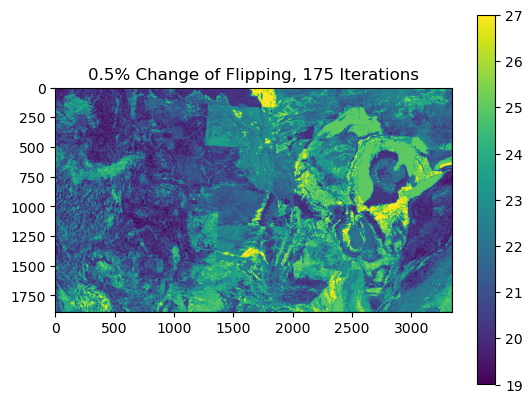

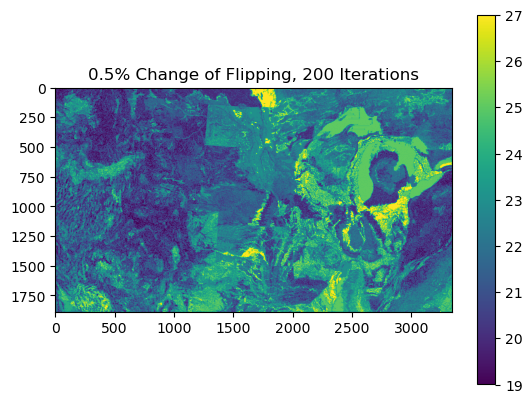

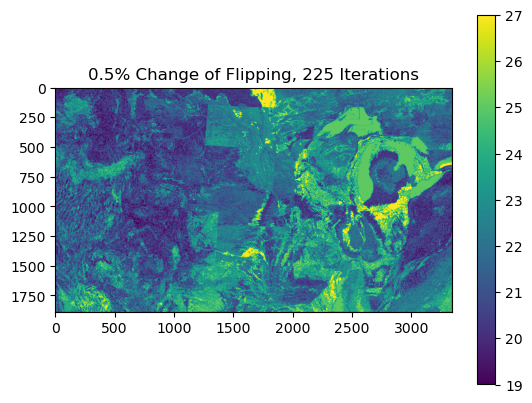

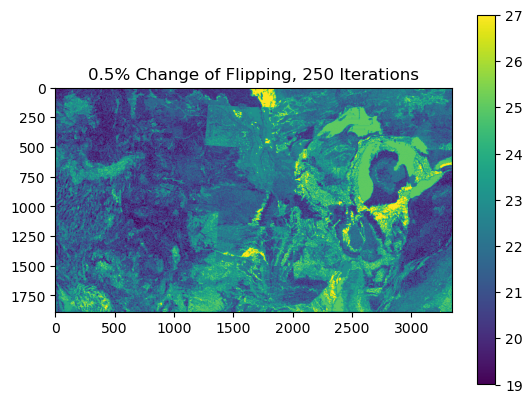

In [9]:
ind_init = read_pfb('/home/at8471/c1_inversion/ml_training/inputs/grid3d.v3.pfb')
bot_ind = ind_init[0,:,:]

end = 251 #number of iterations to rnadom flip ind values
perc_flip = .005 #.3% of TOTAL cells will flip, ~19,000 cells/~6.3 million

for i in range(0,end):
    edges = ndimage.sobel(bot_ind,mode = 'nearest') #detects where edges are using the sobel algorithm (0 = same value vertically and horizontally, non-zero values show either a vertical or horizontal gradient and so are an edge)
    edges[np.where(edges!=0)] = 1 #0 means we are not at an edge (no gradient) in any direction

    #creates an array of random flip locations according to a certain proportion
    cells = bot_ind.shape[0] * bot_ind.shape[1]
    prop_flip = int(perc_flip * cells)
    K = cells - prop_flip 
    arr = np.array([0] * K + [1] * (prop_flip))# K zeros, N-K ones
    np.random.shuffle(arr)
    arr2 = arr.reshape((bot_ind.shape[0],bot_ind.shape[1]))

    #creates an empty array to store where and how we are going to flip
    flip_loc = np.array([0] * K + [0] * (prop_flip))
    flip_loc = flip_loc.reshape((bot_ind.shape[0],bot_ind.shape[1]))

    #finds where there is an edge AND where we are going to randomly flip
    flip_loc[np.where((edges==1) & (arr2==1))] = 1
    flip_loc[flip_loc>0] = np.random.uniform(1, 9, len(flip_loc[flip_loc>0])) #assigns a random value 1-8 to show the D8 direction we are going to flip the value

    #return 8 arrays of what the values would be rolling a particular d8 direction
    d1, d2, d3, d4, d5, d6, d7, d8 = neighbors_d8(flip_loc)

    #assign new values 
    flip_loc_test = flip_loc
    
    flip_loc_test[flip_loc_test==1] = bot_ind[d1==1]
    flip_loc_test[flip_loc_test==2] = bot_ind[d2==2]
    flip_loc_test[flip_loc_test==3] = bot_ind[d3==3]
    flip_loc_test[flip_loc_test==4] = bot_ind[d4==4]
    flip_loc_test[flip_loc_test==5] = bot_ind[d5==5]
    flip_loc_test[flip_loc_test==6] = bot_ind[d6==6]
    flip_loc_test[flip_loc_test==7] = bot_ind[d7==7]
    flip_loc_test[flip_loc_test==8] = bot_ind[d8==8]

    bot_ind[flip_loc_test!=0] = flip_loc_test[flip_loc_test!=0]

    if i%25 == 0:
        write_pfb(f"../outputs/{i}iter_{perc_flip}perc_flip.pfb", bot_ind)

        plt.imshow(np.flip(bot_ind, axis = 0))
        plt.title(f"{perc_flip*100}% Change of Flipping, {i} Iterations")
        plt.colorbar()
        plt.show()
        plt.close()
                


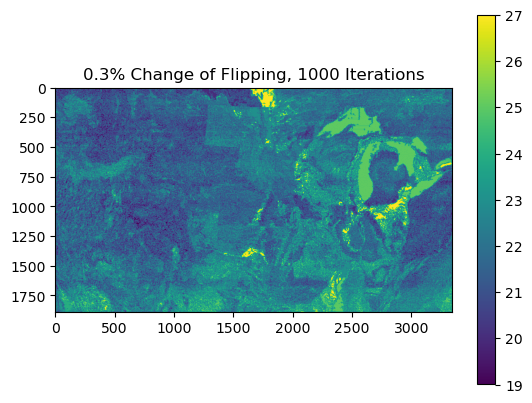

In [12]:
n = 1000
perc_flip = 0.003
bot_ind = read_pfb(f'/home/at8471/subset_pfensemble_wf/produce_indicator_ens/outputs/{n}iter_{perc_flip}perc_flip.pfb')[0,:,:]
plt.imshow(np.flip(bot_ind, axis = 0))
plt.title(f"{perc_flip*100}% Change of Flipping, {n} Iterations")
plt.colorbar()

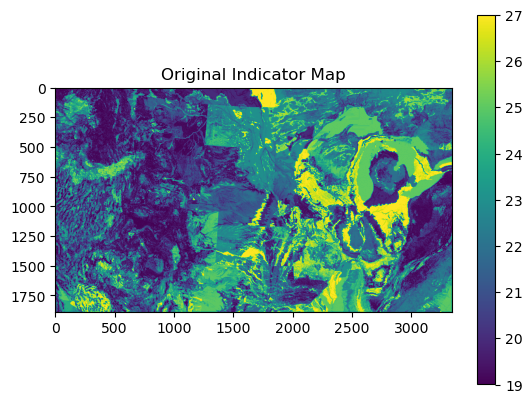

In [14]:
plt.imshow(np.flip(ind_orig[0,:,:], axis = 0))
plt.title("Original Indicator Map")
plt.colorbar()

Text(0.5, 1.0, 'Cells that have changed indicator values')

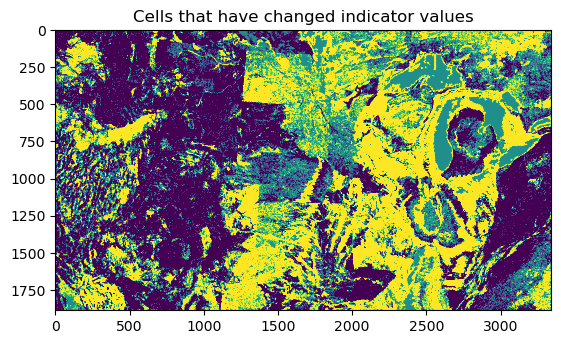

In [13]:
plt.imshow(np.flip((ind_orig[0,:,:]-bot_ind), axis = 0), vmin = -1, vmax = 1)
plt.title("Cells that have changed indicator values")